In [1]:
# import libraries to facilitate calculations and data prep
import os
import math
import pandas as pd
import numpy as np

In [2]:
# load the same pre-processed data

trainX_path = "./trainX.csv"
trainY_path = "./trainY.csv" 
testX_path = "./testX.csv" 
testY_path = "./testY.csv" 

df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)
df_testX = pd.read_csv(testX_path)
df_testY = pd.read_csv(testY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

In [3]:
import time

# import libraries needed to perform learning vis SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# import libraries to evaluate models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# convert df to array for model
x_train = np.array(trainX)
y_train = np.array(trainY)
x_test = np.array(testX)
y_test = np.array(testY)

start_time = time.time()
# perform fitting on original normalized data 
    # from LogR experience, cannot predict impact of scaling
    # from LogR, balancing was shown to be important regardless of scaling
clf = make_pipeline(SVC(class_weight='balanced',verbose=True))
clf_std = make_pipeline(StandardScaler(), SVC(class_weight='balanced',verbose=True))
clf_std_pca = make_pipeline(StandardScaler(), PCA(), SVC(class_weight='balanced',verbose=True))
clf_MinMax = make_pipeline(MinMaxScaler(), SVC(class_weight='balanced',verbose=True))

clf.fit(x_train, y_train)
clf_MinMax.fit(x_train, y_train)
clf_std.fit(x_train, y_train)
clf_std_pca.fit(x_train, y_train)

end_time = time.time()
print(f'{(end_time-start_time):.2f}')

[LibSVM].........................
*.
**.
*
optimization finished, #iter = 26130
obj = -21327.439279, rho = -1.218119
nSV = 21749, nBSV = 18824
Total nSV = 21749
[LibSVM]......................*.....*.*
optimization finished, #iter = 27292
obj = -13522.287267, rho = 0.635499
nSV = 16165, nBSV = 13500
Total nSV = 16165
[LibSVM].................*.....*.*
optimization finished, #iter = 22104
obj = -10234.014973, rho = -0.172896
nSV = 12972, nBSV = 10259
Total nSV = 12972
[LibSVM].................*.....*.*
optimization finished, #iter = 22104
obj = -10234.014973, rho = -0.172896
nSV = 12972, nBSV = 10259
Total nSV = 12972
164.88


              precision    recall  f1-score   support

           n       0.99      0.82      0.90      7984
           y       0.42      0.96      0.58      1058

    accuracy                           0.84      9042
   macro avg       0.71      0.89      0.74      9042
weighted avg       0.93      0.84      0.86      9042

104.54


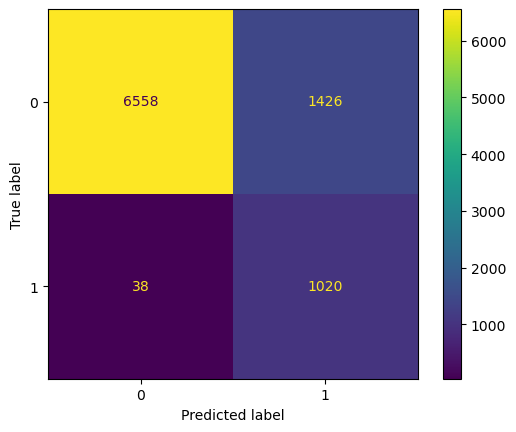

In [4]:
start_time = time.time()

y_hat_train = clf.predict(x_train)
y_hat_test = clf.predict(x_test)

cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, y_hat_test, target_names=['n','y']))

end_time = time.time()
print(f'{(end_time-start_time):.2f}')

#### As expected, scaling improved the results, as in the case of LogR
* marginal improvement with the use of `PCA`

In [5]:
def evaluate_svm(model, x_train, x_test, y_train, y_test):
    # define variables to hold the predicted values
    # models need to be trained outside of the function
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    
    # Evaluate and print metrics
    metrics = [f'{precision_score(y_test, y_hat_test):.2f}', 
               f'{recall_score(y_test, y_hat_test):.2f}',
               f'{f1_score(y_test, y_hat_test):.2f}',
               f'{accuracy_score(y_test, y_hat_test):.2f}']
    
    print(metrics)

In [6]:
start_time = time.time()

models = [clf, clf_std, clf_MinMax, clf_std_pca]
for model in models:
    evaluate_svm(model,
         x_train = x_train, x_test = x_test,
         y_train = y_train, y_test = y_test)
    end_time = time.time()
#     print(f'{(end_time-start_time):.2f}')

['0.42', '0.96', '0.58', '0.84']
['0.71', '0.90', '0.79', '0.94']
['0.75', '0.82', '0.79', '0.95']
['0.71', '0.90', '0.79', '0.94']


#### SVM is outlier-robust
* re-train using data that *excluded* the outlier did not result in significantly better results

In [7]:
# load processed data that included the outlier
trainX_path = "./trainX_dropped.csv"
trainY_path = "./trainY_dropped.csv" 
df_trainX = pd.read_csv(trainX_path)
df_trainY = pd.read_csv(trainY_path)

trainX, testX, trainY, testY = df_trainX, df_testX, df_trainY['oh_y_yes'], df_testY['oh_y_yes']

In [8]:
# convert df to array for model
x_train = np.array(trainX)
y_train = np.array(trainY)
x_test = np.array(testX)
y_test = np.array(testY)

start_time = time.time()
# perform fitting on original normalized data 
    # from LogR experience, cannot predict impact of scaling
    # from LogR, balancing was shown to be important regardless of scaling
clf = make_pipeline(SVC(class_weight='balanced',verbose=True))
clf_std = make_pipeline(StandardScaler(), SVC(class_weight='balanced',verbose=True))
clf_MinMax = make_pipeline(MinMaxScaler(), SVC(class_weight='balanced',verbose=True))

clf.fit(x_train, y_train)
print(f'{((time.time()-start_time)/60):.2f}','min')
         
clf_MinMax.fit(x_train, y_train)
print(f'{((time.time()-start_time)/60):.2f}','min')

clf_std.fit(x_train, y_train)
print(f'{((time.time()-start_time)/60):.2f}','min')

[LibSVM]...........................
*.
*
optimization finished, #iter = 28446
obj = -23753.532698, rho = -1.725517
nSV = 24207, nBSV = 21063
Total nSV = 24207
0.89 min
[LibSVM]......................*....*.*
optimization finished, #iter = 26845
obj = -13130.950828, rho = 0.976628
nSV = 15482, nBSV = 13196
Total nSV = 15482
1.51 min
[LibSVM]..................*....*.*
optimization finished, #iter = 23192
obj = -10162.471015, rho = -0.234416
nSV = 12966, nBSV = 10858
Total nSV = 12966
2.19 min


In [9]:
start_time = time.time()

models = [clf, clf_std, clf_MinMax]
for model in models:
    evaluate_svm(model,
         x_train = x_train, x_test = x_test,
         y_train = y_train, y_test = y_test)
    print(f'{((time.time()-start_time)/60):.2f}','min')

['0.38', '0.96', '0.54', '0.81']
1.97 min
['0.30', '0.37', '0.33', '0.82']
3.08 min
['0.29', '0.46', '0.36', '0.81']
4.38 min


#### Best model prior to hyperparameter tuning
* choose `StandardScalar()` as it has better recall for the under-represented yes-class, but negligibly worse overall accuracy

              precision    recall  f1-score   support

           n       0.91      0.88      0.90      7984
           y       0.30      0.37      0.33      1058

    accuracy                           0.82      9042
   macro avg       0.61      0.63      0.61      9042
weighted avg       0.84      0.82      0.83      9042

1.07 min


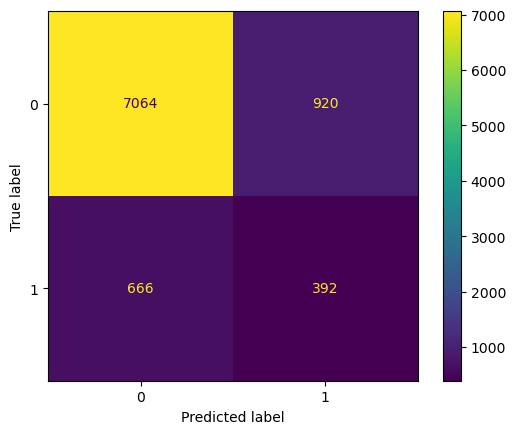

In [10]:
start_time = time.time()

y_hat_train = clf_std.predict(x_train)
y_hat_test = clf_std.predict(x_test)

cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, y_hat_test, target_names=['n','y']))

end_time = time.time()
print(f'{((time.time()-start_time)/60):.2f}','min')

#### we next attempt to further improve performance with hyperparameter tuning of C
* no significant improvement across various values of C, hence suspect not important

In [11]:
# Hyper-parameter tuning of gamma parameter using cross validation

from sklearn.model_selection import GridSearchCV

start_time = time.time()
parameters = {'C':[0.1,0.2,0.5,1.0,2.0,5.0]}
clf_std = GridSearchCV(SVC(class_weight='balanced',verbose=True), parameters)
clf_std.fit(x_train, y_train)
sorted(clf_std.cv_results_.keys())
end_time = time.time()
print(f'{((time.time()-start_time)/60):.2f}','min')

[LibSVM]......................
*.
*
optimization finished, #iter = 22995
obj = -2083.649437, rho = -0.363241
nSV = 21675, nBSV = 18817
Total nSV = 21675
[LibSVM].......................
*
optimization finished, #iter = 23582
obj = -2142.994177, rho = 0.020828
nSV = 22079, nBSV = 19400
Total nSV = 22079
[LibSVM]......................
*.
*
optimization finished, #iter = 22182
obj = -1958.470639, rho = -0.163514
nSV = 20298, nBSV = 17794
Total nSV = 20298
[LibSVM].....................
*.
*
optimization finished, #iter = 22017
obj = -1951.059955, rho = -0.219640
nSV = 20444, nBSV = 17421
Total nSV = 20444
[LibSVM]......................
*.
*
optimization finished, #iter = 22585
obj = -2000.080015, rho = 0.305084
nSV = 20711, nBSV = 18307
Total nSV = 20711
[LibSVM]......................
*.
*
optimization finished, #iter = 22642
obj = -4062.331495, rho = -0.773124
nSV = 21008, nBSV = 18265
Total nSV = 21008
[LibSVM].......................
*
optimization finished, #iter = 23352
obj = -4204.2504

In [12]:
sorted(clf_std.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [13]:
clf_std.cv_results_

{'mean_fit_time': array([31.4174614 , 31.27711725, 39.40812049, 55.4125371 , 32.84979129,
        34.51039491]),
 'std_fit_time': array([ 2.1156242 ,  0.59204676, 16.87931673, 52.43853183,  1.99386969,
         0.53963016]),
 'mean_score_time': array([74.44314466, 14.50941653, 14.23825102, 13.79264493, 15.42302427,
        15.45504098]),
 'std_score_time': array([119.70354048,   0.44768543,   0.98012701,   0.25204646,
          1.30992896,   0.83688527]),
 'param_C': masked_array(data=[0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1},
  {'C': 0.2},
  {'C': 0.5},
  {'C': 1.0},
  {'C': 2.0},
  {'C': 5.0}],
 'split0_test_score': array([0.77025159, 0.78462814, 0.78006635, 0.77619574, 0.76817805,
        0.7607133 ]),
 'split1_test_score': array([0.75615151, 0.79388996, 0.80951064, 0.80660769, 0.80218413,
        0.8005253 ]),
 'split2_test_score': array([0.71357479, 0.750

#### Hyperparameter tuning did not reveal better hyperparameters
* why? can we address this? 
* we need to turn to more advance methods that can do boosting/bagging via emsemble methods